## **Outlier Analysis**

The significance of handling outliers in machine learning cannot be overstated. Outliers, or data points that deviate significantly from the majority of the data, can have a high impact on the performance and accuracy of models.

- **Box plot:** Box plots are a versatile data visualization tool that provide a concise summary of a dataset's distribution. They are particularly useful for comparing multiple datasets or identifying outliers
- **Scatter plot:** Scatter plots to visualize the relationship between the target variable and each feature. Look for clusters of outliers or unusual patterns.

Features to analyze:

- Down/Up Ratio *
- Average Packet Size
- Fwd Segment Size avg 
- Bwd Segment Size avg 
- Fwd Bytes/Bulk Avg 
- Fwd Bulk Rate/Avg
- Subflow Fwd, Bwd Packets 
- Subflow Fwd, Bwd Bytes
- Fwd init win Bytes
- Bwd init win Bytes 
- Fwd act data pkts 
- Active mean 
- Idle mean
- Total TCP Flow time *


In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [2]:
# Functions

def read_data(data_path: str, columns_to_read: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=columns_to_read)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")


def scatter_plot(data: pd.DataFrame, x: str, fig_size: tuple, y: str ='Label', hue: str ='Label', save: bool=True):
    """
    This function creates a scatter plot
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(data=data, x=x, y=y, hue=hue)

    # Save plot
    if save:
        folder_name = 'outlier_plots'
        file_name = f'{x.strip()}_scatter_plot.png'   
        save_plot(folder_name, file_name)

    plt.show()


def box_plot(data: pd.DataFrame, x: str, whis: float=1.5, palette: str='viridis', if_grid: bool = True, save: bool=True):

    # Create the box plot using Seaborn
    sns.boxplot(data[x], palette=palette, showmeans=True, whis=whis)
    plt.title('Box Plot of Random Data')
    plt.ylabel('Values')
    plt.grid(if_grid)

    # Save plot
    if save:
        folder_name = 'outlier_plots'
        file_name = f'{x.strip()}_box_plot.png'   
        save_plot(folder_name, file_name)

    plt.show()


# more ...

**Data**

In [3]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Down/Up Ratio', 'Average Packet Size' ,'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 
    'Fwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Bwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes', 'FWD Init Win Bytes',
    'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Active Mean', 'Idle Mean', 'Total TCP Flow Time', 'Label'
]

# Read the data
try:
    data = read_data(file_path, columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 17 features


In [4]:
# code to remove categorical columns from data
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"There are {len(categorical_columns)} categorical features!")
print("Removing these features")
data = data.drop(categorical_columns, axis=1)

There are 0 categorical features!
Removing these features


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Down/Up Ratio         float64
 1   Average Packet Size   float64
 2   Fwd Segment Size Avg  float64
 3   Bwd Segment Size Avg  float64
 4   Fwd Bytes/Bulk Avg    int64  
 5   Fwd Bulk Rate Avg     int64  
 6   Subflow Fwd Packets   int64  
 7   Subflow Fwd Bytes     int64  
 8   Subflow Bwd Packets   int64  
 9   Subflow Bwd Bytes     int64  
 10  FWD Init Win Bytes    int64  
 11  Bwd Init Win Bytes    int64  
 12  Fwd Act Data Pkts     int64  
 13  Active Mean           float64
 14  Idle Mean             float64
 15  Total TCP Flow Time   int64  
 16  Label                 int64  
dtypes: float64(6), int64(11)
memory usage: 419.1 MB


In [6]:
data.describe()

,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Active Mean,Idle Mean,Total TCP Flow Time,Label
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06
mean,7.773432e-01,2.164166e+02,1.893546e+02,2.271624e+02,8.967764e+03,8.445195e+05,8.419746e-02,1.090405e+02,4.518061e-05,1.064850e+02,6.023249e+04,4.957609e+02,7.550082e+01,2.437296e+05,6.715270e+05,7.186553e+07,1.643862e-01
std,2.816420e-01,6.260783e+02,3.597574e+02,1.211658e+03,4.137666e+04,1.737915e+07,2.776838e-01,2.147488e+02,6.721501e-03,5.991156e+02,1.583170e+04,8.530959e+02,4.182399e+02,2.654499e+06,5.274227e+06,1.686803e+09,7.431021e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.894977e-01,7.900000e+01,5.833333e+01,2.975000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.300000e+01,0.000000e+00,1.300000e+01,6.424000e+04,5.020000e+02,1.000000e+00,0.000000e+00,0.000000e+00,6.991000e+03,0.000000e+00
50%,8.333333e-01,8.209091e+01,8.750000e+01,7.140000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,3.200000e+01,6.424000e+04,5.020000e+02,1.000000e+00,0.000000e+00,0.000000e+00,3.671400e+04,0.000000e+00
75%,1.000000e+00,1.260000e+02,1.472857e+02,7.140000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.900000e+01,0.000000e+00,3.500000e+01,6.424000e+04,5.020000e+02,2.000000e+00,0.000000e+00,0.000000e+00,1.232845e+05,0.000000e+00
max,3.000000e+01,1.814490e+04,1.715153e+04,3.493059e+04,1.756019e+06,2.534442e+09,1.000000e+00,1.054700e+04,1.000000e+00,1.813700e+04,6.549500e+04,6.470400e+04,7.830000e+03,1.148279e+08,1.199621e+08,8.638926e+10,1.100000e+01


In [7]:
data.columns

Index(['Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg',
       'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Bulk Rate Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts', 'Active Mean', 'Idle Mean', 'Total TCP Flow Time',
       'Label'],
      dtype='object')

--- 
### **Outlier Analysis**

To analyze the impact of outliers on the target feature and their dependency!

- **Scatter Plots**
- **Box plots**
- **Heatmaps**
- **Statistical tests**

Fig saved successfully!


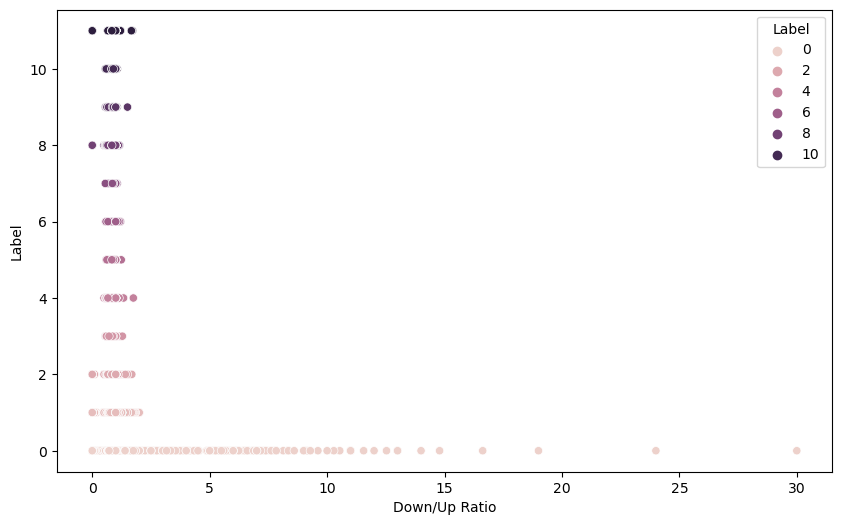

In [15]:
# Down/Up ratio
# Feature: Flow Bytes/s 

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Down/Up Ratio', y='Label', hue='Label')

# Save plot
save = True
if save:
    folder_name = 'outlier_plots'
    file_name = f'DownUpRatio_plot.png'   
    save_plot(folder_name, file_name)

plt.show()

> No correlation bw outliers and label 

> **Outlier needs to be removed**

Fig saved successfully!


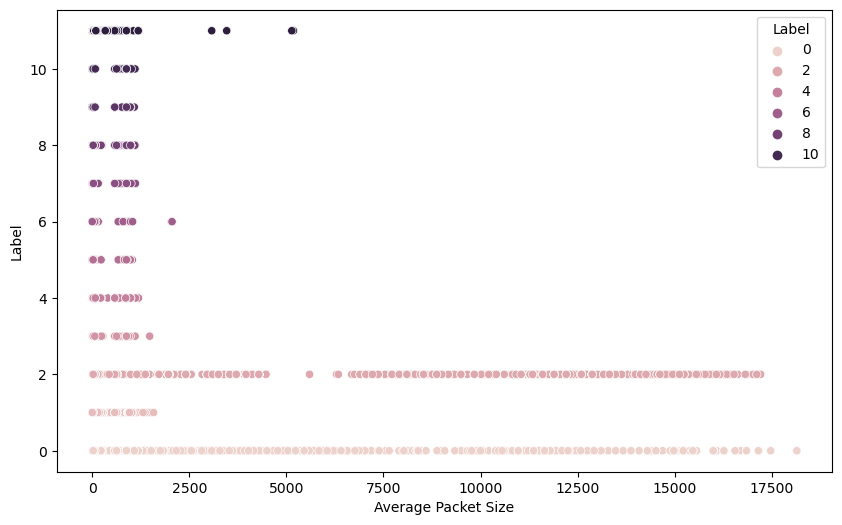

In [16]:
# Feature: Average Packet Size
scatter_plot(data, x='Average Packet Size', y='Label', hue='Label', fig_size =(10,6), save=True)

> Label 2 has outliers but over all no correlation of higher labels with any outliers 

> **Outliers can be removed**

Fig saved successfully!


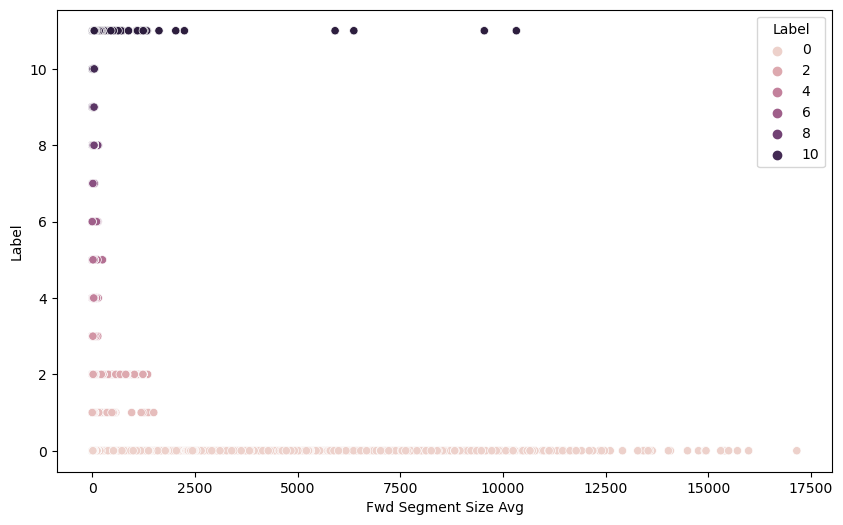

In [17]:
# Feature: Fwd Segment Size Avg
scatter_plot(data, x='Fwd Segment Size Avg', y='Label', hue='Label', fig_size =(10,6), save=True)

> **Outliers can be removed**

Fig saved successfully!


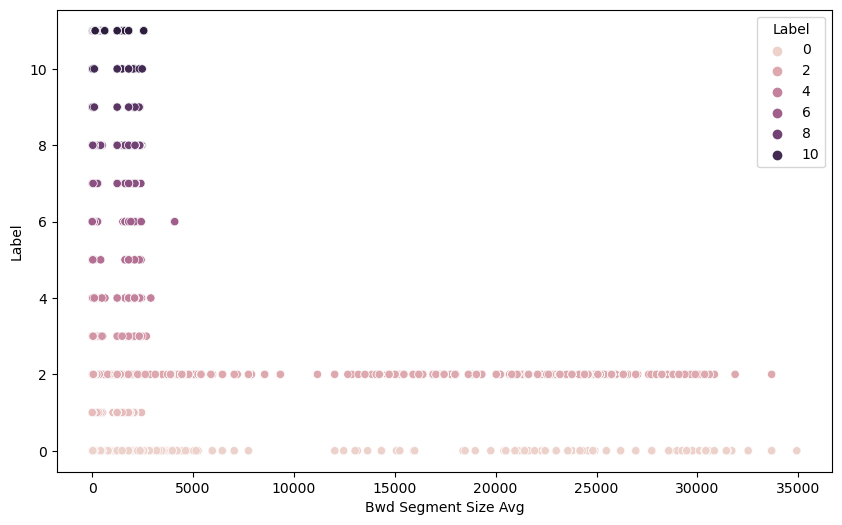

In [19]:
# Feature: Fwd Segment Size Avg
scatter_plot(data, x='Bwd Segment Size Avg', y='Label', hue='Label', fig_size =(10,6), save=True)

> **Outliers can be removed**

Fig saved successfully!


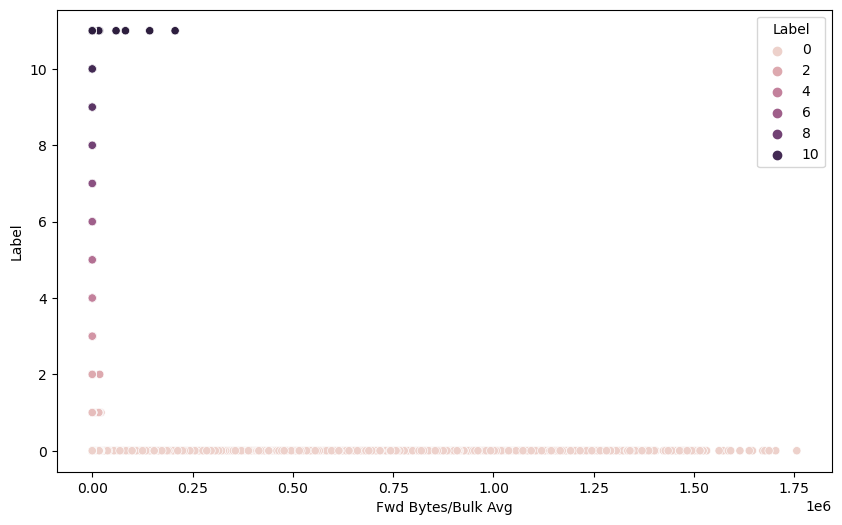

In [26]:
# Feature: 'Fwd Bytes/Bulk Avg'
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fwd Bytes/Bulk Avg', y='Label', hue='Label')

# Save plot
save = True
if save:
    folder_name = 'outlier_plots'
    file_name = f'FwdBytesBulkAvg_plot.png'   
    save_plot(folder_name, file_name)

plt.show()

> label 11 does have some dependance on higher values of forward bytes per bulk average 

> **Drop outliers after the value 0.25 1e6 for Fwd Bytes/Bulk avg, then normalize**

Fig saved successfully!


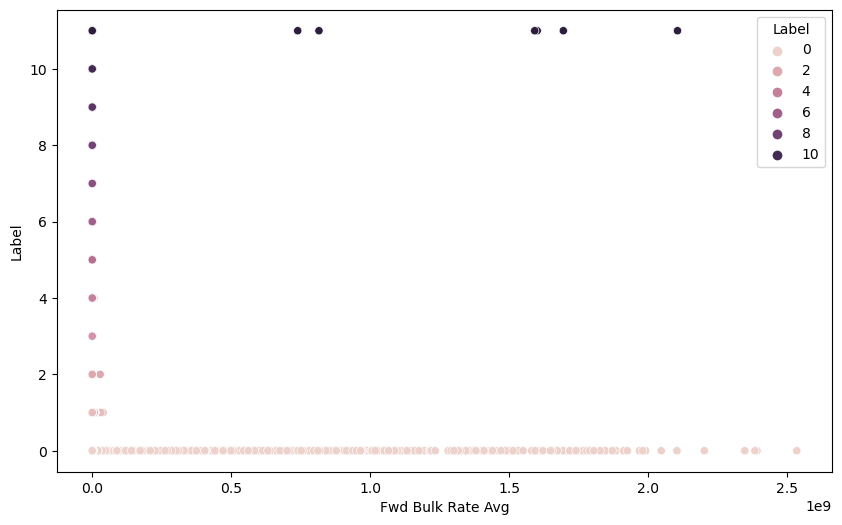

In [10]:
# Feature: Fwd Bulk Rate Avg
scatter_plot(data, x='Fwd Bulk Rate Avg', y='Label', hue='Label', fig_size =(10,6), save=True)

> Since label 11 is dependant on increasing value of forward bulk rate average 

> **We might transform the data, outlier removal is not needed**

Fig saved successfully!


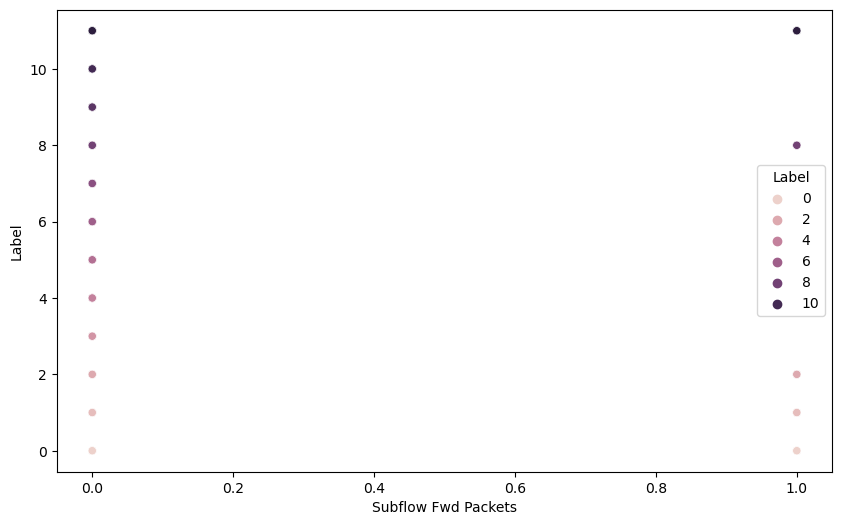

In [11]:
# Feature: Sub flow Fwd Packets
scatter_plot(data, x='Subflow Fwd Packets', y='Label', hue='Label', fig_size =(10,6), save=True)

> **Outliers doesn't need to be removed**

Fig saved successfully!


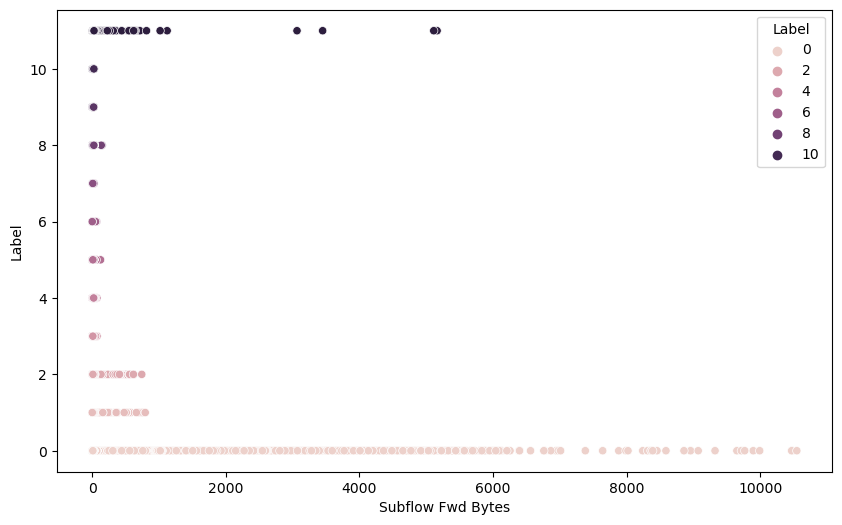

In [15]:
# Subflow Fwd Bytes
scatter_plot(data, x='Subflow Fwd Bytes', y='Label', hue='Label', fig_size =(10,6), save=True)

> **Drop outliers after value 2000** then normalize

Fig saved successfully!


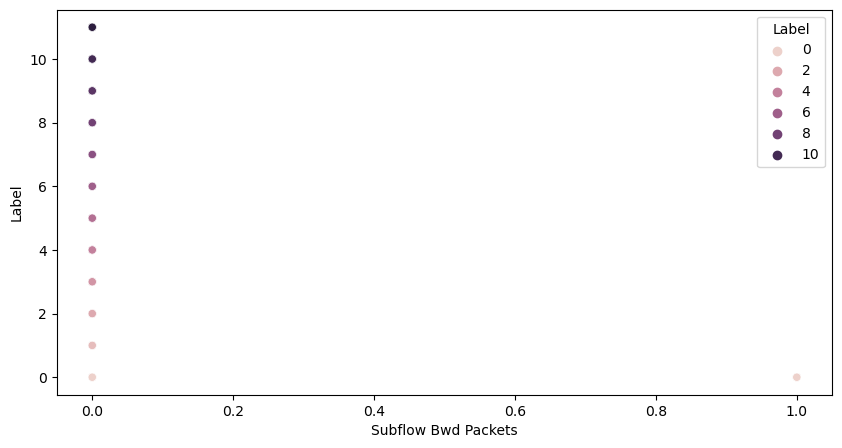

In [17]:
# Feature: Subflow Bwd Packets
scatter_plot(data, x='Subflow Bwd Packets', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Remove outliers**

Fig saved successfully!


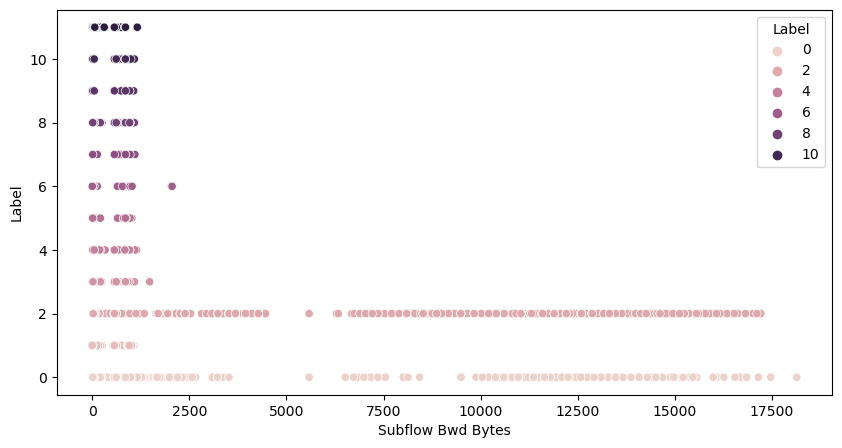

In [18]:
# Feature: Subflow Bwd Bytes
scatter_plot(data, x='Subflow Bwd Bytes', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Remove outliers after value 2500 then normalize**

Fig saved successfully!


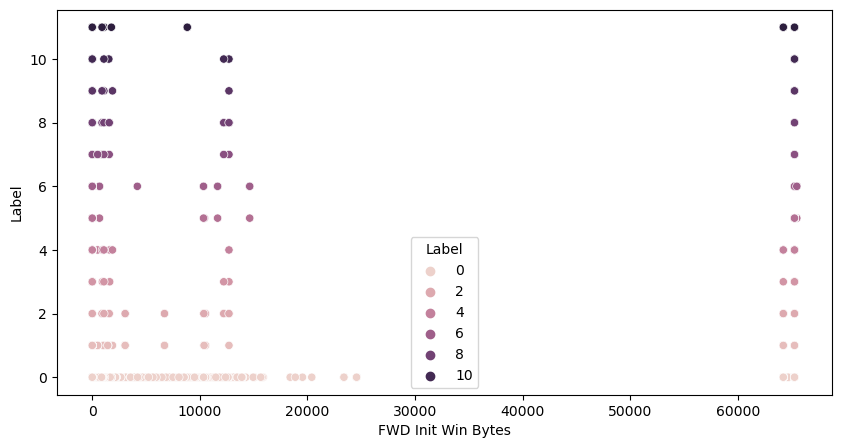

In [19]:
# Feature: FWD Init Win Bytes
scatter_plot(data, x='FWD Init Win Bytes', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Don't remove outliers**

Fig saved successfully!


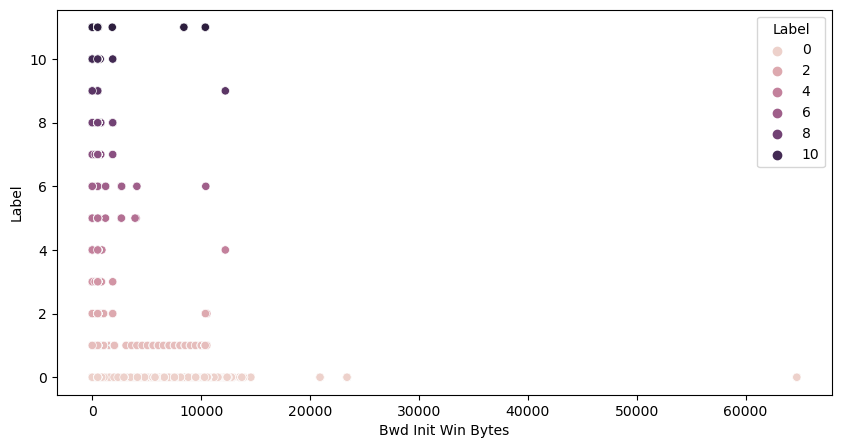

In [20]:
# Feature: Bwd Init Win Bytes
scatter_plot(data, x='Bwd Init Win Bytes', y='Label', hue='Label', fig_size =(10,5), save=True)

> Some dependency of Labels till the value 12000

> **Remove outliers after this value and then normalize**

Fig saved successfully!


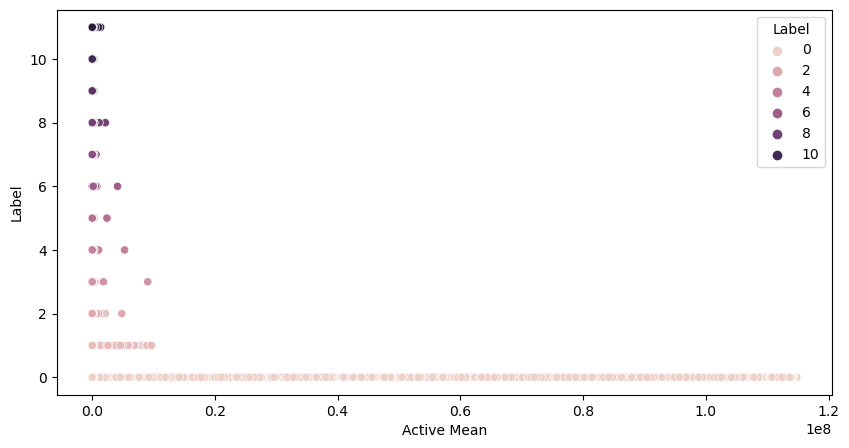

In [21]:
# Feature: 'Active Mean'
scatter_plot(data, x='Active Mean', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Outliers can be removed**

Fig saved successfully!


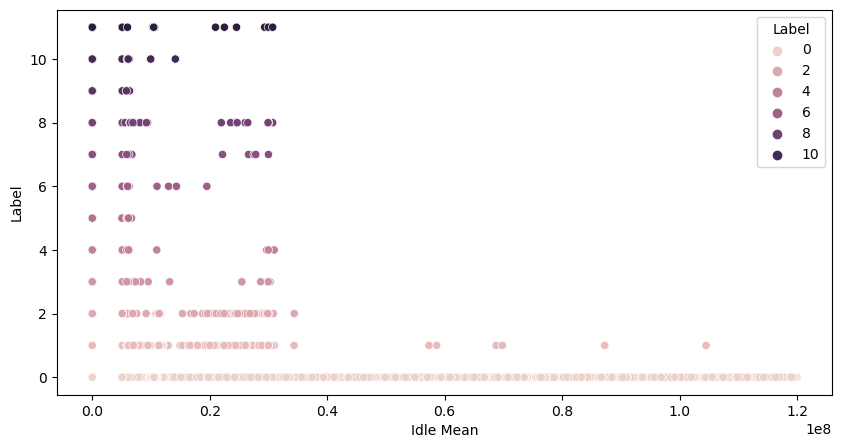

In [22]:
# Feature: 'Idle Mean'
scatter_plot(data, x='Idle Mean', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Outliers need to be removed after the value 0.4 1e8 then normalize**

Fig saved successfully!


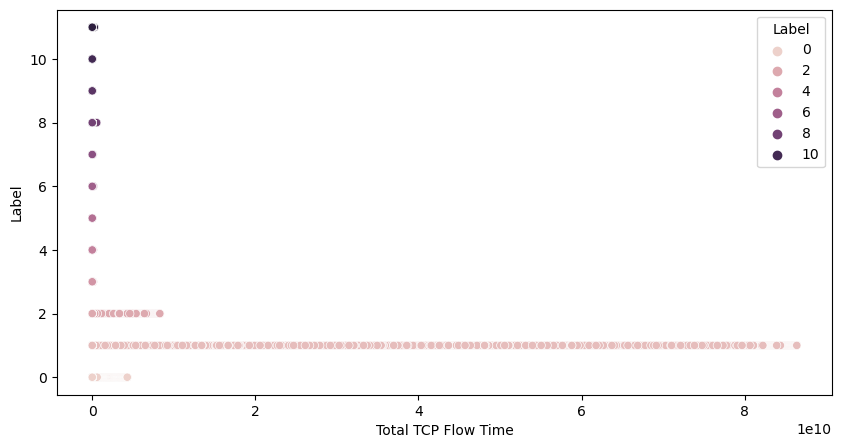

In [23]:
# Feature: 'Total TCP Flow Time'
scatter_plot(data, x='Total TCP Flow Time', y='Label', hue='Label', fig_size =(10,5), save=True)

> **Outliers can be removed**